In [1]:
import pandas as pd
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [2]:
zip_file_path = 'data/spotify_most_streamed_2024.zip'

df = None

with zipfile.ZipFile(zip_file_path, 'r') as z:
    csv_filename = z.namelist()[0]

    with z.open(csv_filename) as f:
        df = pd.read_csv(f, encoding='unicode_escape')

print(df.head())


                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [3]:
print("Initial Data Types and Column Names:")
print(df.dtypes)
print("\nInitial Column Names:")
print(df.columns)

def clean_column_name(col_name):
    col_name = col_name.strip() 
    col_name = col_name.lower()  
    col_name = col_name.replace(' ', '_') 
    col_name = col_name.replace('(', '').replace(')', '')  
    col_name = col_name.replace('%', 'percent')  
    return col_name

df.columns = df.columns.to_series().apply(clean_column_name)

print("\nCleaned Column Names:")
print(df.columns)

print("\nChecking for unnecessary columns:")
print(df.isna().sum())

df = df.dropna(axis=1, how='all')

print("\nCleaned DataFrame:")
print(df.head())
print("\nData Types After Cleaning:")
print(df.dtypes)


Initial Data Types and Column Names:
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud St

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [4]:
artist_song_count = df['artist'].value_counts()

top_5_artists = artist_song_count.head(5)
print("Top 5 Artists with the Most Songs:")
print(top_5_artists)

clean_songs_df = df[df['explicit_track'] == False]

clean_artist_song_count = clean_songs_df['artist'].value_counts()

top_5_clean_artists = clean_artist_song_count.head(5)
print("\nTop 5 'Clean-Mouthed' Artists with No Explicit Songs:")
print(top_5_clean_artists)


Top 5 Artists with the Most Songs:
artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

Top 5 'Clean-Mouthed' Artists with No Explicit Songs:
artist
Taylor Swift     50
Billie Eilish    25
Bad Bunny        18
KAROL G          18
Morgan Wallen    17
Name: count, dtype: int64


### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [5]:
df['spotify_streams'] = pd.to_numeric(df['spotify_streams'].str.replace(',', ''), errors='coerce')

artist_streams = df.groupby('artist')['spotify_streams'].sum()

sorted_artist_streams = artist_streams.sort_values(ascending=False)

top_5_streamed_artists = sorted_artist_streams.head(5)

print("Top 5 Most Streamed Artists:")
print(top_5_streamed_artists)

Top 5 Most Streamed Artists:
artist
Bad Bunny       3.705483e+10
The Weeknd      3.694854e+10
Drake           3.496216e+10
Taylor Swift    3.447077e+10
Post Malone     2.613747e+10
Name: spotify_streams, dtype: float64


### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

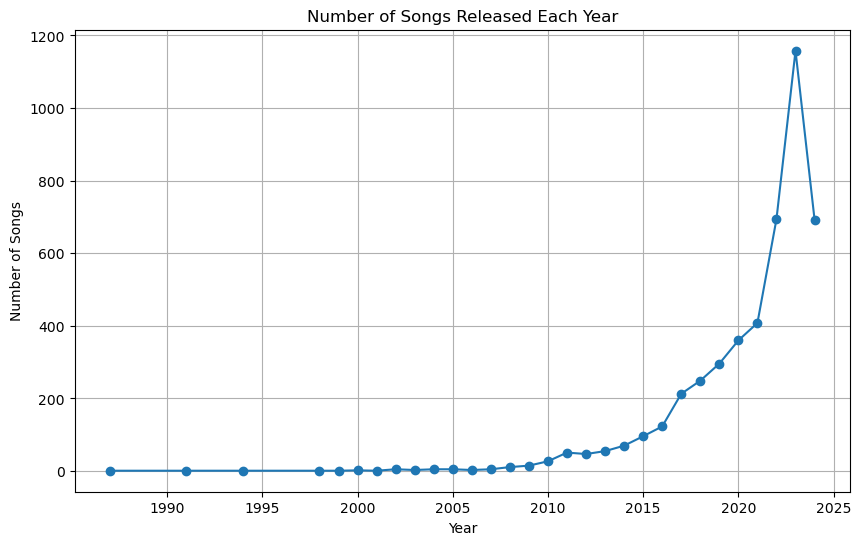

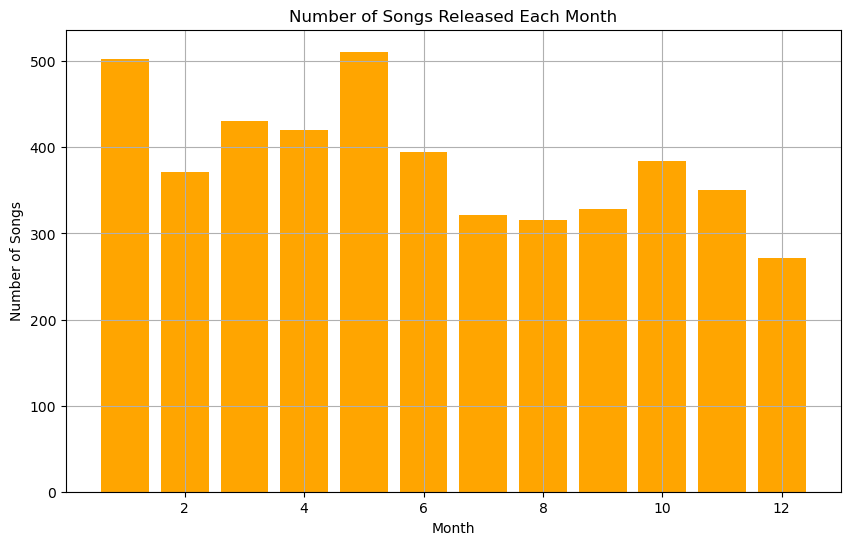

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

songs_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(songs_per_year.index, songs_per_year.values, marker='o')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

songs_per_month = df['release_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(songs_per_month.index, songs_per_month.values, color='orange')
plt.title('Number of Songs Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

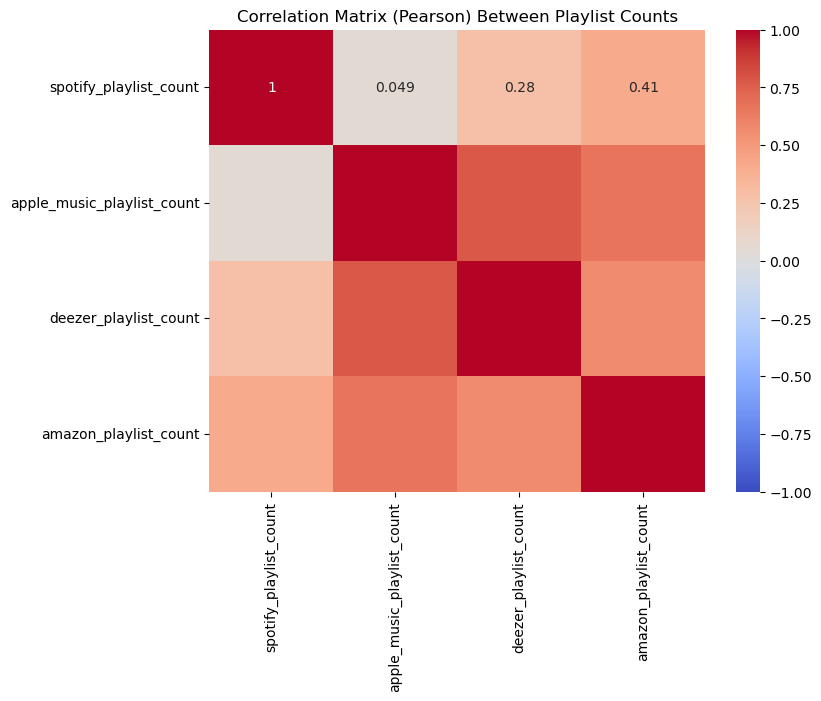

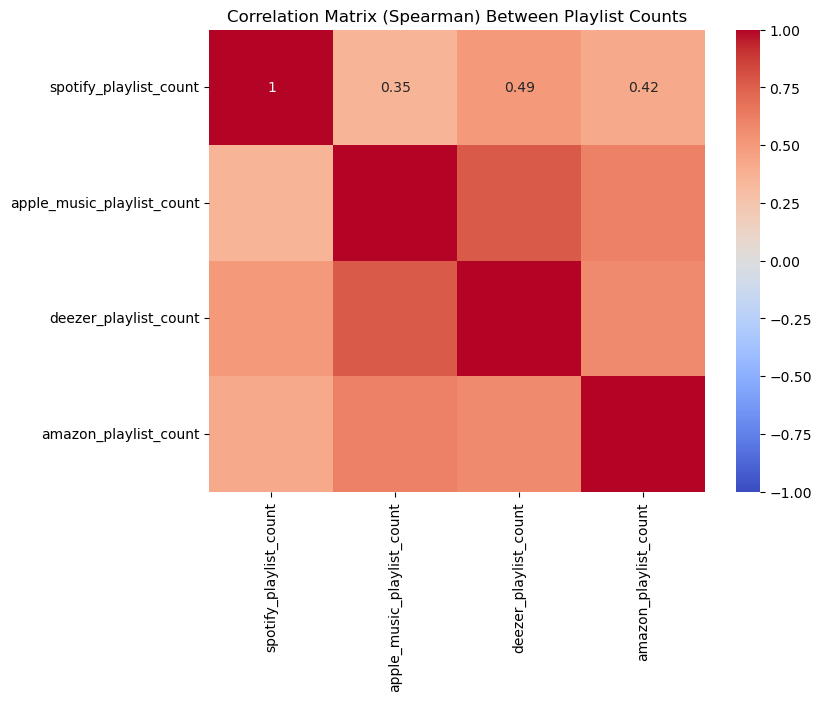

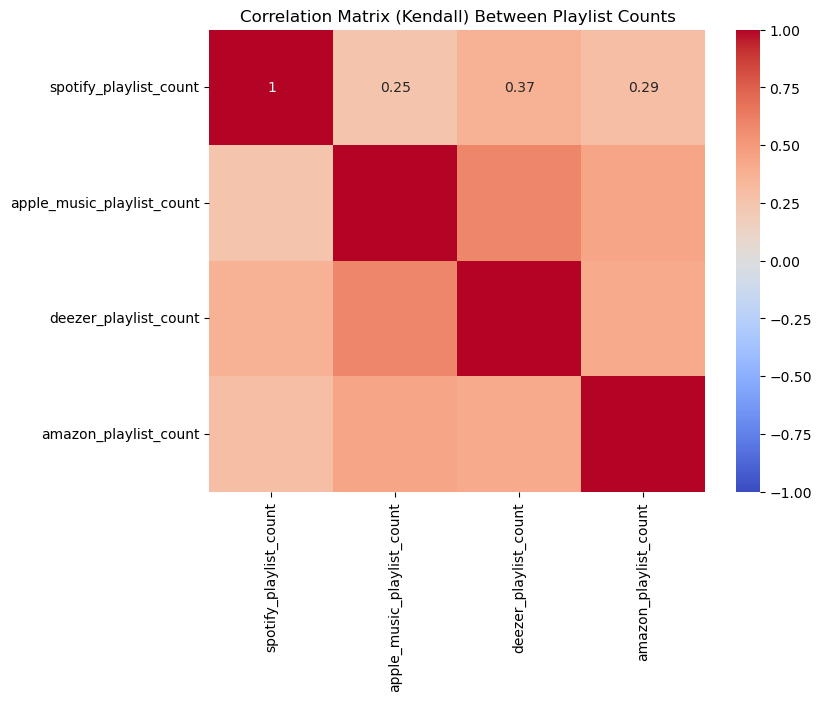

C:\Users\deadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

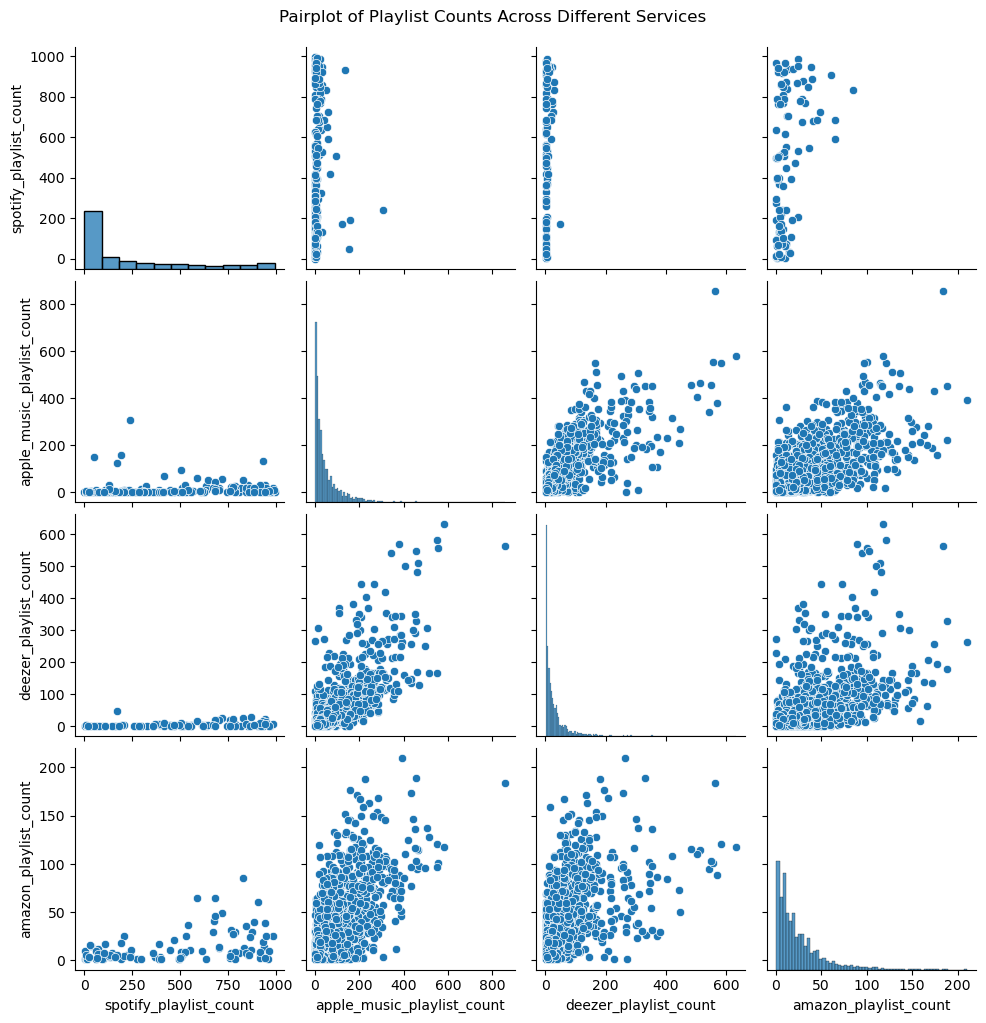

In [7]:
playlist_columns = ['spotify_playlist_count', 'apple_music_playlist_count', 
                    'deezer_playlist_count', 'amazon_playlist_count']

df[playlist_columns] = df[playlist_columns].apply(pd.to_numeric, errors='coerce')

correlation_matrix = df[playlist_columns].corr(method='pearson')  
spearman_corr = df[playlist_columns].corr(method='spearman')
kendall_corr = df[playlist_columns].corr(method='kendall')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Pearson) Between Playlist Counts')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Spearman) Between Playlist Counts')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Kendall) Between Playlist Counts')
plt.show()

sns.pairplot(df[playlist_columns])
plt.suptitle('Pairplot of Playlist Counts Across Different Services', y=1.02)
plt.show()

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

Correlation between YouTube views and likes: nan


C:\Users\deadh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\deadh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\deadh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


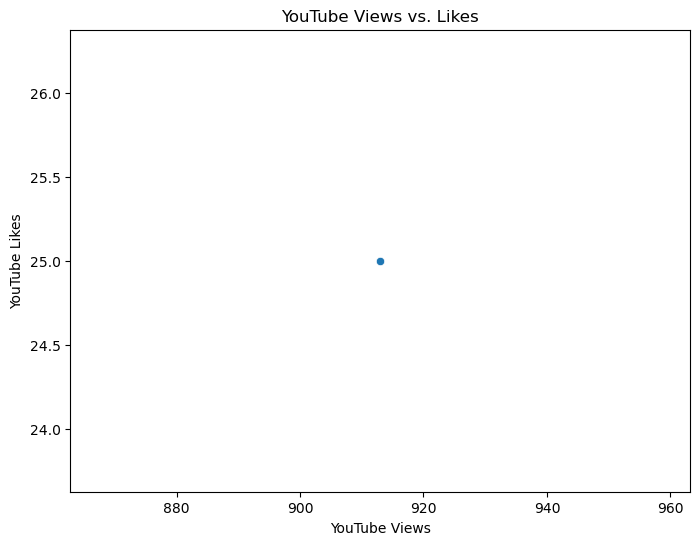

C:\Users\deadh\AppData\Local\Temp\ipykernel_20932\1951196454.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['views_to_likes_ratio'] = df_clean['youtube_views'] / df_clean['youtube_likes']
C:\Users\deadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean YouTube Views-to-Likes Ratio: 36.52


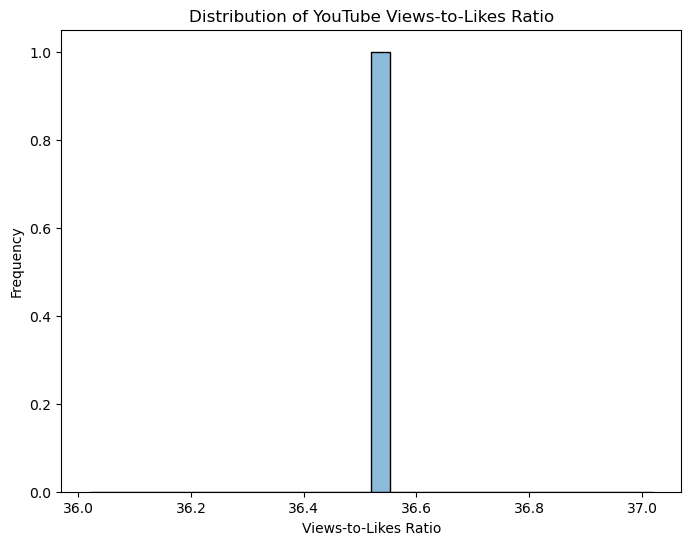

In [8]:
youtube_columns = ['youtube_views', 'youtube_likes']

df[youtube_columns] = df[youtube_columns].apply(pd.to_numeric, errors='coerce')

df_clean = df.dropna(subset=youtube_columns)

correlation_views_likes = df_clean['youtube_views'].corr(df_clean['youtube_likes'])
print(f'Correlation between YouTube views and likes: {correlation_views_likes:.2f}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='youtube_views', y='youtube_likes', data=df_clean)
plt.title('YouTube Views vs. Likes')
plt.xlabel('YouTube Views')
plt.ylabel('YouTube Likes')
plt.show()

df_clean['views_to_likes_ratio'] = df_clean['youtube_views'] / df_clean['youtube_likes']

mean_ratio = df_clean['views_to_likes_ratio'].mean()
print(f'Mean YouTube Views-to-Likes Ratio: {mean_ratio:.2f}')

plt.figure(figsize=(8, 6))
sns.histplot(df_clean['views_to_likes_ratio'], kde=True, bins=30)
plt.title('Distribution of YouTube Views-to-Likes Ratio')
plt.xlabel('Views-to-Likes Ratio')
plt.ylabel('Frequency')
plt.show()

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['tiktok_views'] = pd.to_numeric(df['tiktok_views'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

C:\Users\deadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\deadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


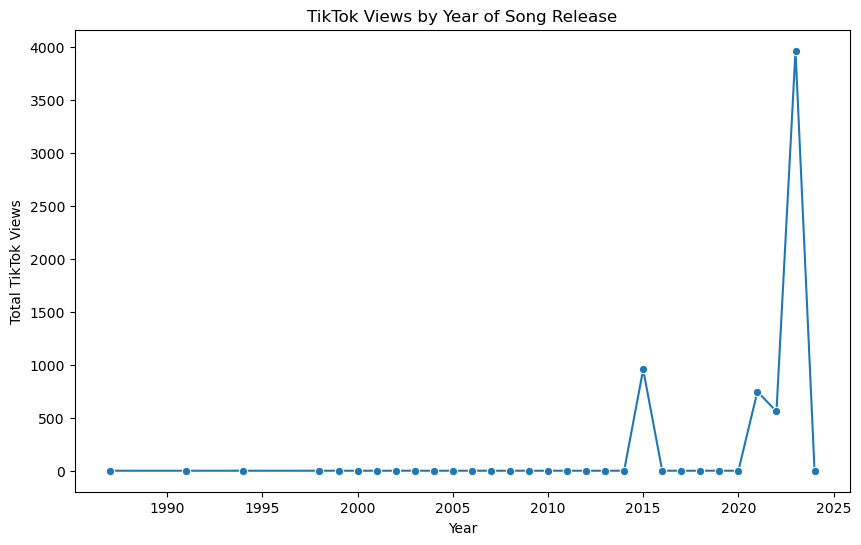

Years with the highest TikTok views:
    release_year  tiktok_views
28          2023        3966.0
20          2015         956.0
26          2021         747.0
27          2022         560.0
0           1987           0.0


In [10]:
# TikTok Views by Year

tiktok_views_by_year = df.groupby('release_year')['tiktok_views'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=tiktok_views_by_year, x='release_year', y='tiktok_views', marker='o')
plt.title('TikTok Views by Year of Song Release')
plt.xlabel('Year')
plt.ylabel('Total TikTok Views')
plt.show()

peak_years = tiktok_views_by_year.sort_values(by='tiktok_views', ascending=False).head()
print("Years with the highest TikTok views:")
print(peak_years)

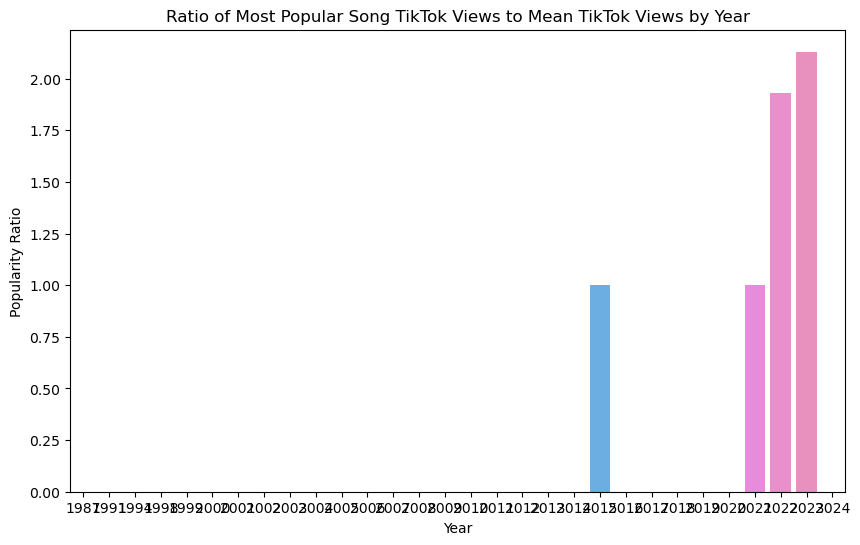

Year: 1987 has no data for maximum TikTok views.
Year: 1991 has no data for maximum TikTok views.
Year: 1994 has no data for maximum TikTok views.
Year: 1998 has no data for maximum TikTok views.
Year: 1999 has no data for maximum TikTok views.
Year: 2000 has no data for maximum TikTok views.
Year: 2001 has no data for maximum TikTok views.
Year: 2002 has no data for maximum TikTok views.
Year: 2003 has no data for maximum TikTok views.
Year: 2004 has no data for maximum TikTok views.
Year: 2005 has no data for maximum TikTok views.
Year: 2006 has no data for maximum TikTok views.
Year: 2007 has no data for maximum TikTok views.
Year: 2008 has no data for maximum TikTok views.
Year: 2009 has no data for maximum TikTok views.
Year: 2010 has no data for maximum TikTok views.
Year: 2011 has no data for maximum TikTok views.
Year: 2012 has no data for maximum TikTok views.
Year: 2013 has no data for maximum TikTok views.
Year: 2014 has no data for maximum TikTok views.
Year: 2015, Song: Le

In [11]:
# Popularity of the Most Popular Song vs Mean
mean_tiktok_views_by_year = df.groupby('release_year')['tiktok_views'].mean().reset_index()
max_tiktok_views_by_year = df.groupby('release_year')['tiktok_views'].max().reset_index()

popularity_comparison = pd.merge(mean_tiktok_views_by_year, max_tiktok_views_by_year, on='release_year', suffixes=('_mean', '_max'))

popularity_comparison['popularity_ratio'] = popularity_comparison['tiktok_views_max'] / popularity_comparison['tiktok_views_mean']

plt.figure(figsize=(10, 6))
sns.barplot(data=popularity_comparison, x='release_year', y='popularity_ratio')
plt.title('Ratio of Most Popular Song TikTok Views to Mean TikTok Views by Year')
plt.xlabel('Year')
plt.ylabel('Popularity Ratio')
plt.show()

for year in popularity_comparison['release_year']:
    # Identify the maximum TikTok views for the year
    max_views = popularity_comparison.loc[popularity_comparison['release_year'] == year, 'tiktok_views_max'].values[0]
    
    max_views_song = df[(df['release_year'] == year) & (df['tiktok_views'] == max_views)]
    
    if not max_views_song.empty:
        print(f"Year: {year}, Song: {max_views_song['track'].values[0]}, Artist: {max_views_song['artist'].values[0]}, TikTok Views: {max_views_song['tiktok_views'].values[0]}")
    else:
        print(f"Year: {year} has no data for maximum TikTok views.")

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.